#### load in modules

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### read in simulation output

In [37]:
simulated_inferred_rate_median = pd.read_csv('./results/detection_probs_time.csv')

#### plot inferred importation rates at different sampling proportions

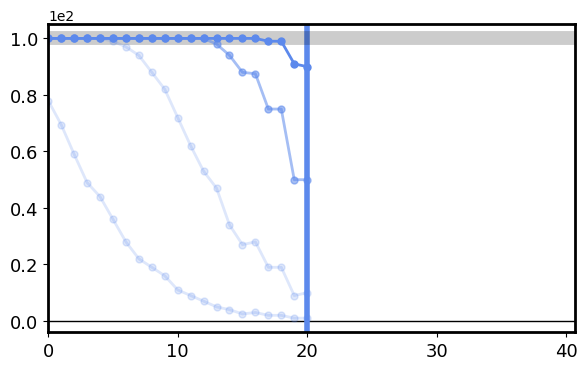

In [38]:
fig, ax = plt.subplots(figsize=(6.8, 4))

# add vertical/horizontal lines
ax.axhline(y=0, color='black', linewidth=1, linestyle='-', alpha=1)
ax.axvline(x=20, color='#5C89EC', linewidth=4, linestyle='-', alpha=1)

# sampling proportions to plot (make sure that these are in the data)
sps2plot = [0.01, 0.1, 0.5, 0.9]

# plot true importation rate
times = np.linspace(0, 50, 100)
true_rates = [100] * 100
ax.plot(times, true_rates, color='black', linewidth=10, linestyle='-', alpha=0.2)

for sampling_prop in sps2plot:
    median_df = simulated_inferred_rate_median.loc[simulated_inferred_rate_median['sampling_prop'] == sampling_prop]
    ax.plot([int(t) for t in median_df.columns[1:]], median_df.values[0][1:],
            color='#5C89EC', linewidth=2, marker='o', markersize=5,
            alpha=max(0.2, (sampling_prop - min(sps2plot)) / (max(sps2plot) - min(sps2plot))))
        
# adjust x-limits
plt.xlim(0, 40.7)
plt.ylim(-4, 105)

# adjust x-axis labels
plt.xticks(np.arange(0, 40.7, step=10))
plt.yticks(np.arange(0, 105, step=50))

# write y-axis label in scientific notation
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# adjust x-axis font size
plt.xticks(fontsize=13)
# adjust y-axis font size
plt.yticks([0, 20, 40, 60, 80, 100], fontsize=13)

# add plot border
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

plt.show()